In [1]:
import tensorflow as tf
import numpy as np


2023-05-08 15:44:30.283079: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 15:44:30.542059: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 15:44:30.545218: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 15:44:38.379823: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# son nuestros datos y resultados que consumira nuestro modelo
celsius = np.array([-40,-10,0,8,15,22,38],dtype=float)
fahrenheit = np.array([-40,14,32,46,59,72,100],dtype=float)

In [3]:
# usamos el framework keras (nos ahorra lineas de codigo para la creacion de las capas)
# capas densas => capa con conexion a todas la neuronas de la siguiente capa
# units cuantas neuronas tenemos
# input_shape => le decimos que tenemos una entrada de una neurona

# capa = tf.keras.layers.Dense(units=1,input_shape=[1])
# la capa esta volando => necesito ponerla en un modelo
# Sequential es un modelo simple 

# modelo = tf.keras.Sequential([capa])

In [4]:
# que pasa si añadimos una nuevas capas ocultas
# con mas capas => tarda mas
# aprendizaje mucho mas rapido
oculta1 = tf.keras.layers.Dense(units=7,input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=7)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1,oculta2,salida])

In [5]:
# quiero compilar el modelo para que empieze a aprender => hay disitintos tipos que determinan como aprendera nuestro modelo
# optimizer => adam algoritmo => sirve para equilibrar o ajustar los pesos y no desaprenda nuestro modelo
# el valor numerico es la taza de aprendizaje => que tanto ajustar
# taza chica, aprendizaje lento
# taza grande, no podra hacer cambios finos para acercarse lo mas posbile al valor real
# error cuadratio medio => una poca cantidad de errores grandes es peor que muchos pequeños
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='mean_squared_error')

In [43]:
print("Comenzando entrenamiento...")
# entrenamos el modelo, con datos de entrada, los resultado esperados, los epochs que son las vueltas a hacer para ir ajustando el aprendizaje
# verbose igual a false para que no muestre todo lo que hace durante el aprendizaje
historial = modelo.fit(celsius,fahrenheit,epochs=50,verbose=False)
print("modelo entrenado!!")

Comenzando entrenamiento...
modelo entrenado!!


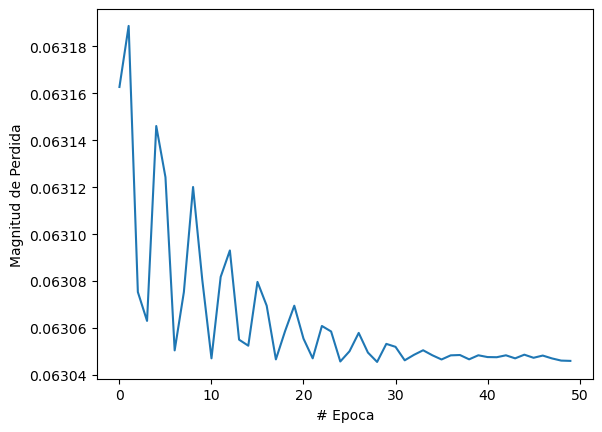

In [44]:
import matplotlib.pyplot as plt
# con esto podemos ver que tanto se equivoco hasta finalmente aprender a calcular
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de Perdida")
plt.plot(historial.history["loss"])


In [45]:
print("Hagamos una predicción")
resultado = modelo.predict([100.0])
print(f"el resultado es {resultado} F°")

Hagamos una predicción
1/1 [==============================] - 0s 51ms/step
el resultado es [[211.75157]] F°


In [36]:
print("Variables internas del modelo")
# con solo una capa
#print(capa.get_weights())
# con 2 capas ocultas
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.35721603,  0.75834167, -0.4030296 ]], dtype=float32), array([-2.4967823,  3.454089 , -3.7274365], dtype=float32)]
[array([[-0.42794678, -1.2134833 , -0.01765824],
       [ 1.407122  ,  0.5610322 , -0.45263964],
       [-1.1760541 , -0.5985235 ,  0.8011783 ]], dtype=float32), array([ 3.8870685,  3.6087978, -1.948481 ], dtype=float32)]
[array([[ 0.9686239],
       [ 1.2145045],
       [-0.252932 ]], dtype=float32), array([3.4403787], dtype=float32)]
